In [1]:
import pandas as pd
df=pd.read_csv("Cricket.csv",encoding = 'unicode_escape')

In [45]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=100)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded = df.apply(le.fit_transform)
print(encoded)

In [46]:
from pyclustertend import hopkins

hopkins(encoded,79)

0.13128764379493202

In [47]:
df1=encoded.copy()
df1["Name"]=df["Player"]
print(df1)

    Player  Span  Mat  Inns  NO   Runs  HS    Ave     BF     SR  100  50   0  \
0        1     1  463   452  41  18426   1  44.83  21367  86.23   49  96  20   
1        2     2  404   380  41  14234   2  41.98  18048  78.86   25  93  15   
2        3     3  375   365  39  13704   3  42.03  17046  80.39   30  82  20   
3        4     4  445   433  18  13430   4  32.36  14725  91.20   28  68  34   
4        5     5  448   418  39  12650   5  33.37  16020  78.96   19  77  28   
..     ...   ...  ...   ...  ..    ...  ..    ...    ...    ...  ...  ..  ..   
74      75    39  128   127  13   5134  60  45.03   7908  64.92   11  31   3   
75      76    53  162   149  31   5122  61  43.40   6945  73.75    0  42   6   
76      77    64  197   181  37   5092  28  35.36   6614  76.98    5  26   7   
77      78    65  198   161  33   5088  62  39.75   5504  92.44    6  30  15   
78      79     9  265   228  57   5080  53  29.70   6252  81.25    3  23  14   

                           Name  
0    

In [48]:
y_predicted = km.fit_predict(encoded[['Ave','SR']])
df1['cluster']=y_predicted

In [49]:
k = df1[df1['Name']=="V Kohli (INDIA)"]['cluster']
x=print(k.iloc[0])
type(x)

2


NoneType

In [50]:
a = df1[df1['cluster']==1]['Name']
a

1     KC Sangakkara (Asia/ICC/SL)
2            RT Ponting (AUS/ICC)
4      DPMD Jayawardene (Asia/SL)
5       Inzamam-ul-Haq (Asia/PAK)
9                BC Lara (ICC/WI)
11     Mohammad Yousuf (Asia/PAK)
14           M Azharuddin (INDIA)
16               PA de Silva (SL)
17              CH Gayle (ICC/WI)
18              Saeed Anwar (PAK)
23                 ME Waugh (AUS)
26                  HH Gibbs (SA)
29                MJ Clarke (AUS)
30                 SR Waugh (AUS)
31               A Ranatunga (SL)
33              Younis Khan (PAK)
35             Saleem Malik (PAK)
37              GC Smith (Afr/SA)
40                 A Flower (ZIM)
41             Shoaib Malik (PAK)
44               Ijaz Ahmed (PAK)
48          WU Tharanga (Asia/SL)
49            ML Hayden (AUS/ICC)
53                 JN Rhodes (SA)
54          Mohammad Hafeez (PAK)
56                 RR Sarwan (WI)
58                 CL Hooper (WI)
60            Tamim Iqbal (BDESH)
62                 WJ Cronje (SA)
66            

In [51]:
b=df1[df1['Name']=="SR Tendulkar (INDIA)"]['cluster']
c=df1[df1['Name']=="IVA Richards (WI)"]['cluster']
print(b.iloc[0])
print(c.iloc[0])

2
2


Text(0, 0.5, 'SR')

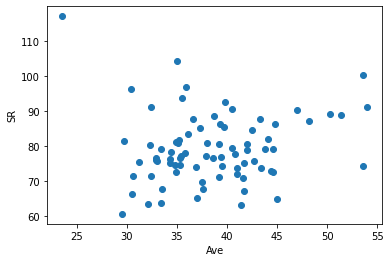

In [52]:
from matplotlib import pyplot as plt
plt.scatter(df['Ave'],df['SR'])
plt.xlabel('Ave')
plt.ylabel('SR')

Text(0, 0.5, 'Strike rate')

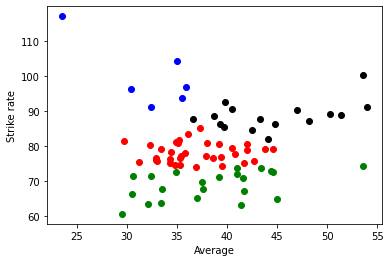

In [53]:
a1 = df1[df1.cluster==0]
a2 = df1[df1.cluster==1]
a3 = df1[df1.cluster==2]
a4 = df1[df1.cluster==3]
plt.scatter(a1['Ave'],a1['SR'],color='green')
plt.scatter(a2['Ave'],a2['SR'],color='red')
plt.scatter(a3['Ave'],a3['SR'],color='black')
plt.scatter(a4['Ave'],a4['SR'],color='blue')
plt.xlabel('Average')
plt.ylabel('Strike rate')

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_avg = silhouette_score(encoded[['Ave','SR']],y_predicted)
sil_avg

0.3377420770210726

In [55]:
for i in range(2,20):
    km = KMeans(n_clusters=i,random_state=100)
    y_predicted = km.fit_predict(encoded[['Ave','SR']])
    sil_avg = silhouette_score(encoded[['Ave','SR']],y_predicted)
    print("Number of cluster is :",i,"Silhouette measure : ",sil_avg)

Number of cluster is : 2 Silhouette measure :  0.47132870091524437
Number of cluster is : 3 Silhouette measure :  0.40393804739275
Number of cluster is : 4 Silhouette measure :  0.3377420770210726
Number of cluster is : 5 Silhouette measure :  0.37372828238914374
Number of cluster is : 6 Silhouette measure :  0.3877868817122899
Number of cluster is : 7 Silhouette measure :  0.3800357691365834
Number of cluster is : 8 Silhouette measure :  0.36693404809555924
Number of cluster is : 9 Silhouette measure :  0.34652538155256457
Number of cluster is : 10 Silhouette measure :  0.34513272455349064
Number of cluster is : 11 Silhouette measure :  0.34976732826047047
Number of cluster is : 12 Silhouette measure :  0.3628125268293126
Number of cluster is : 13 Silhouette measure :  0.37064701038586323
Number of cluster is : 14 Silhouette measure :  0.3458655602800936
Number of cluster is : 15 Silhouette measure :  0.33235550968479777
Number of cluster is : 16 Silhouette measure :  0.35472877809209